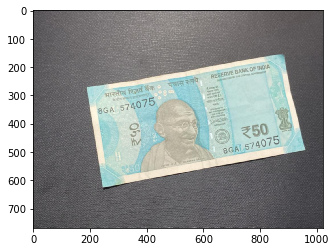

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('50_1.jpeg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blurred = cv2.GaussianBlur(img_rgb, (5, 5), 0) # Remove noise
plt.imshow(blurred)img = cv2.imread('50_1.jpeg')


In [ ]:
# Load the foreground input image
image = cv2.imread('50_1.jpeg')

# Change the color of foreground image to RGB
# and resize image to match shape of R-band in RGB output map
foreground = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a background array to hold white pixels
# with the same size as RGB output map
background = 255 * np.ones_like(image).astype(np.uint8)

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)

# Create a binary mask of the RGB output map using the threshold value 0
th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

# Apply a slight blur to the mask to soften edges
alpha = cv2.GaussianBlur(alpha, (7,7),0)

# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255

# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)

# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)

# Add the masked foreground and background
outImage = cv2.add(foreground, background)

# Return a normalized output image for display
return outImage/255


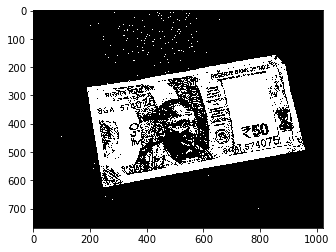

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

im = cv2.imread('50_1.jpeg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,195,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(image,cmap='gray')

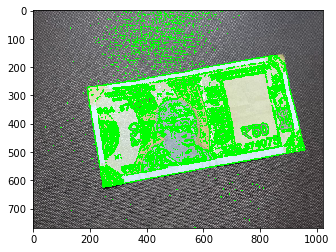

In [25]:
img1 = cv2.drawContours(im, contours, 3, (0,255,0), 3)
plt.imshow(img1)

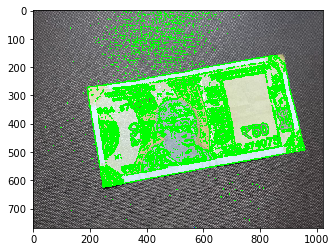

In [27]:
cnt=contours[4]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img2 = cv2.drawContours(im,[box],0,(0,0,255),2)
plt.imshow(img2)

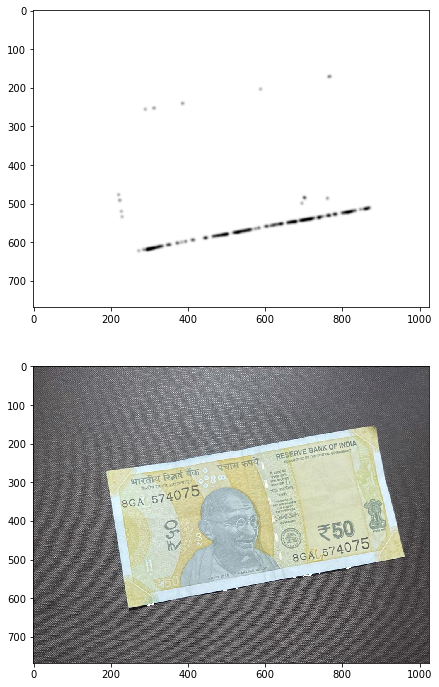

In [40]:
import cv2
import numpy as np
import skimage.exposure

# load image and get dimensions
img = cv2.imread("50_1.jpeg")
img1= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# convert to hsv
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# threshold using inRange
range1 = (10,70,10)
range2 = (80,255,255)
mask = cv2.inRange(hsv,range1,range2)
mask = 255 - mask

# apply morphology opening to mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# antialias mask
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
mask = skimage.exposure.rescale_intensity(mask, in_range=(127.5,255), out_range=(0,255))

result = img.copy()
result[mask==0] = (255,255,255)

# write result to disk
#cv2.imwrite("soccer_mask.png", mask)
#cv2.imwrite("soccer_green2white.jpg", result)

# display it
#cv2.imshow("mask", mask)
#cv2.imshow("result", result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.imshow(mask,cmap='gray')
plt.subplot(2,1,2)
plt.imshow(result)

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('50_1.jpeg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
img = cv2.GaussianBlur(img, (5, 5), 0)
# threshold based on hsv
mask = cv2.inRange(img, np.array([0,40, 0]), np.array([40, 255, 255]))
# dilate threshold mask
mask = cv2.dilate(mask, cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)))
# find large contours with more than 4 points
image, cnts, hierarchy  = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = list(filter(lambda c: len(c) >= 6 and cv2.contourArea(c) >= 1e3, cnts))
assert(len(cnts) == 1)
cv2.drawContours(image, cnts, -1, (0, 255, 0), 2)

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.imshow(image)
plt.subplot(2,1,2)
plt.imshow(mask)

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:272: error: (-215:Assertion failed) npoints >= 0 && (depth == 5 || depth == 4) in function 'cv::contourArea'


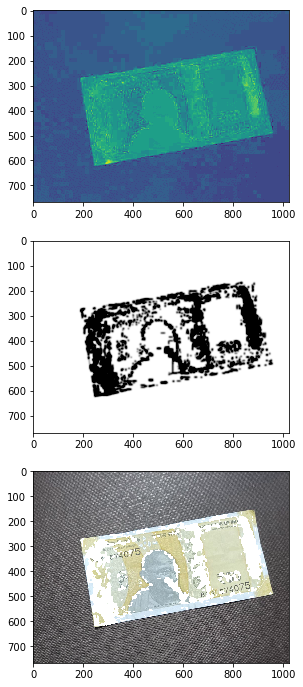

In [56]:
import cv2
import numpy as np
import skimage.exposure

# load image and get dimensions
img = cv2.imread("50_1.jpeg")

# convert to lab
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
L = lab[:,:,0]
A = lab[:,:,1]
B = lab[:,:,2]

# negate A
A = (255 - A)

# multiply negated A by B
nAB = 255 * (A/255) * (B/255)
nAB = np.clip((nAB), 0, 255)
nAB = np.uint8(nAB)


# threshold using inRange
range1 = 70
range2 = 100
mask = cv2.inRange(nAB,range1,range2)
mask = 255 - mask

# apply morphology opening to mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# antialias mask
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
mask = skimage.exposure.rescale_intensity(mask, in_range=(127.5,255), out_range=(0,255))

# put white where ever the mask is zero
result = img.copy()
result[mask==0] = (255,255,255)

# write result to disk
#cv2.imwrite("soccer_green2white_inrange_lab.jpg", result)

# display it
#cv2.imshow("nAB", nAB)
#cv2.imshow("mask", mask)
#cv2.imshow("result", result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.imshow(nAB)
plt.subplot(3,1,2)
plt.imshow(mask,cmap='gray')
plt.subplot(3,1,3)
plt.imshow(result)

In [57]:
import cv2 
from matplotlib import pyplot as plt 
  
# Opening image 
img = cv2.imread("50_1.jpeg") 
  
# OpenCV opens images as BRG  
# but we want it as RGB We'll  
# also need a grayscale version 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  
  
# Use minSize because for not  
# bothering with extra-small  
# dots that would look like STOP signs 
found = stop_data.detectMultiScale(img_gray,  
                                   minSize =(20, 20)) 
  
# Don't do anything if there's  
# no sign 
amount_found = len(found) 
  
if amount_found != 0: 
      
    # There may be more than one 
    # sign in the image 
    for (x, y, width, height) in found: 
          
        # We draw a green rectangle around 
        # every recognized sign 
        cv2.rectangle(img_rgb, (x, y),  
                      (x + height, y + width),  
                      (0, 255, 0), 5) 
          
# Creates the environment of  
# the picture and shows it 
plt.subplot(1, 1, 1) 
plt.imshow(img_rgb) 
plt.show() 

NameError: name 'stop_data' is not defined

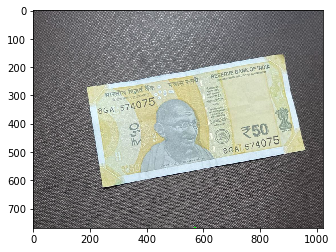

In [60]:
import numpy as np
import cv2
import imutils

image = cv2.imread("50_1.jpeg") # path = path to your file
bin = cv2.inRange(image, (0, 0, 0), (0, 0,0))
cv2.bitwise_not(bin, bin)
cnts = cv2.findContours(bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
areas = [cv2.contourArea(c) for c in cnts]
max_index = np.argmax(areas)
cnt=contours[max_index]

x,y,w,h = cv2.boundingRect(cnt)
img2=cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img2)

In [68]:
image = cv2.imread("50_1.jpeg") # path = path to your file
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
COLOR_MIN = np.array([110, 150, 100],np.uint8)
COLOR_MAX = np.array([150, 255, 255],np.uint8)
frame_threshed = cv2.inRange(hsv_img, COLOR_MIN, COLOR_MAX)
imgray = frame_threshed
ret,thresh = cv2.threshold(frame_threshed,127,255,0)
image2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Find the index of the largest contour
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]
x,y,w,h = cv2.boundingRect(cnt)
img2=cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img2)

ValueError: attempt to get argmax of an empty sequence

IndexError: list index out of range

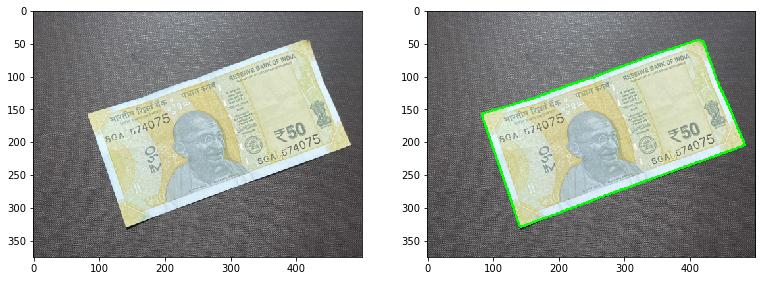

In [25]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
def transform(pos):
# This function is used to find the corners of the object and the dimensions of the object
    pts=[]
    n=len(pos)
    for i in range(n):
        pts.append(list(pos[i][0]))
       
    sums={}
    diffs={}
    tl=tr=bl=br=0
    for i in pts:
        x=i[0]
        y=i[1]
        sum=x+y
        diff=y-x
        sums[sum]=i
        diffs[diff]=i
    sums=sorted(sums.items())
    diffs=sorted(diffs.items())
    n=len(sums)
    rect=[sums[0][1],diffs[0][1],diffs[n-1][1],sums[n-1][1]]
    #      top-left   top-right   bottom-left   bottom-right
   
    h1=np.sqrt((rect[0][0]-rect[2][0])**2 + (rect[0][1]-rect[2][1])**2)     #height of left side
    h2=np.sqrt((rect[1][0]-rect[3][0])**2 + (rect[1][1]-rect[3][1])**2)     #height of right side
    h=max(h1,h2)
   
    w1=np.sqrt((rect[0][0]-rect[1][0])**2 + (rect[0][1]-rect[1][1])**2)     #width of upper side
    w2=np.sqrt((rect[2][0]-rect[3][0])**2 + (rect[2][1]-rect[3][1])**2)     #width of lower side
    w=max(w1,w2)
   
    return int(w),int(h),rect
 
img=cv2.imread('50_3.jpeg')
r=500.0 / img.shape[1]
dim=(500, int(img.shape[0] * r))
img=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)


plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img)  


gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.GaussianBlur(gray,(11,11),0)
edge=cv2.Canny(gray,100,200)
_,contours,_=cv2.findContours(edge.copy(),1,1)
cv2.drawContours(img,contours,-1,[0,255,0],2)
#cv2.imshow('Contours',img)
plt.subplot(1,3,2)
plt.imshow(img)


n=len(contours)
max_area=0
pos=0
for i in contours:
    area=cv2.contourArea(i)
    if area>max_area:
        max_area=area
        pos=i
peri=cv2.arcLength(pos,True)
approx=cv2.approxPolyDP(pos,0.02*peri,True)
 
size=img.shape
w,h,arr=transform(approx)
 
pts2=np.float32([[0,0],[w,0],[0,h],[w,h]])
pts1=np.float32(arr)
M=cv2.getPerspectiveTransform(pts1,pts2)
dst=cv2.warpPerspective(img,M,(w,h))
image=cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
#image=cv2.adaptiveThreshold(image,255,1,0,11,2)
image = cv2.resize(image,(w,h),interpolation = cv2.INTER_AREA)
#cv2.imshow('OUTPUT',image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.subplot(1,3,3)
plt.imshow(image)



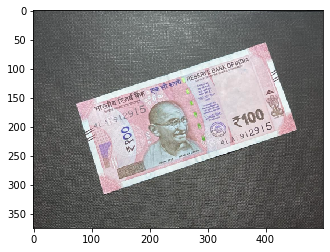

In [20]:
img=cv2.imread('100_1.jpeg')
r=500.0 / img.shape[1]
dim=(500, int(img.shape[0] * r))
img2=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(img2)